In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import load_workbook

sns.set(style='whitegrid', palette='muted')

In [3]:
pnad3 = (pd.read_csv('dados/pnad.csv')
                                     .query('idade > 17')  # incluir apenas quem já poderia ter concluído o ensino médio
                                     .query('freq_esc == 2')) # apenas quem não frequenta mais a escola

pnad3['sexo'] = pnad3.sexo.astype('category') # transformando em categórica
pnad3.sexo = pnad3.sexo.cat.rename_categories(['masculino', 'feminino'])

In [4]:
pnad3.nivel_instrucao.value_counts()

2.0    129671
5.0    106461
7.0     44608
1.0     43232
3.0     32718
4.0     19527
6.0      6754
Name: nivel_instrucao, dtype: int64

In [5]:
pnad3.nivel_instrucao = pnad3.nivel_instrucao.replace([4, 6], [3, 5])
pnad3['nivel_instrucao'] = pnad3.nivel_instrucao.astype('category')
pnad3.nivel_instrucao.cat.rename_categories(['sem instrução', 'fundamental inc.', 'fundamental', 'médio', 'superior'], inplace=True)
pnad3.nivel_instrucao.cat.as_ordered(inplace=True)

In [6]:
pnad3.nivel_instrucao.value_counts()

fundamental inc.    129671
médio               113215
fundamental          52245
superior             44608
sem instrução        43232
Name: nivel_instrucao, dtype: int64

In [7]:
pnad4 = pnad3.query('nivel_instrucao == ["fundamental", "médio"]') # apenas quem possui ensino fundamental ou médio completo
pnad4.nivel_instrucao.cat.remove_unused_categories(inplace=True)

In [8]:
pnad4.nivel_instrucao.value_counts()

médio          113215
fundamental     52245
Name: nivel_instrucao, dtype: int64

In [8]:
# 2.0    33.9
# 5.0    27.8
# 7.0    11.6
# 1.0    11.3
# 3.0     8.5
# 4.0     5.1
# 6.0     1.8
nivel = (pnad3.nivel_instrucao.value_counts(normalize=True)*100).round(1)
nivel = pd.DataFrame(nivel).reset_index().iloc[[4, 0, 2, 1, 3]]
nivel.columns = ['nível de instrução', '%']
nivel

,nível de instrução,%
4,sem instrução,11.3
0,fundamental inc.,33.9
2,fundamental,13.6
1,médio,29.6
3,superior,11.6


### **Ocupações mais comuns (maiores de 17 que não frequentam a escola)**

In [9]:
temp = (pnad4.query('nivel_instrucao == "médio"').ocup_cod.value_counts(normalize=True)*100).round(1)
temp = pd.DataFrame(temp).reset_index()
temp.columns = ['ocup_desc', 'médio']

temp = (pnad4.query('nivel_instrucao == "médio"').ocup_desc.value_counts(normalize=True)*100).round(1)
temp = pd.DataFrame(temp).reset_index()
temp.columns = ['ocup_desc', 'médio']

temp2 = (pnad4.query('nivel_instrucao == "fundamental"').ocup_desc.value_counts(normalize=True)*100).round(1)
temp2 = pd.DataFrame(temp2).reset_index()
temp2.columns = ['ocup_desc', 'fundamental']

temp3 = temp.merge(temp2)
temp3['diferença'] = temp3.fundamental - temp3.médio

In [10]:
ocup_fund = temp3.sort_values('fundamental', ascending=False).head(10)
ocup_fund

,ocup_desc,médio,fundamental,diferença
3,trab_serv_domest,3.5,7.4,3.9
5,agricultor,2.3,4.8,2.5
10,pedreiros,1.9,4.7,2.8
4,trab_limp_interior_edif_esc_hotel,2.6,4.0,1.4
0,balc_vend_loja,6.8,3.8,-3.0
2,comerciante_loja,3.7,3.6,-0.1
14,criador_gado,1.5,3.2,1.7
8,cond_caminhão_pesado,2.0,3.2,1.2
20,trab_element_agricult,1.2,3.1,1.9
25,trab_element_constr_edif,0.9,2.4,1.5


In [11]:
ocup_med = temp3.sort_values('médio', ascending=False).head(10)
ocup_med

,ocup_desc,médio,fundamental,diferença
0,balc_vend_loja,6.8,3.8,-3.0
1,escriturario_geral,3.9,1.0,-2.9
2,comerciante_loja,3.7,3.6,-0.1
3,trab_serv_domest,3.5,7.4,3.9
4,trab_limp_interior_edif_esc_hotel,2.6,4.0,1.4
5,agricultor,2.3,4.8,2.5
6,guarda_seg,2.2,1.8,-0.4
7,cond_carro_taxi_caminhonete,2.2,1.9,-0.3
9,caixa_exped_bilhete,2.0,0.8,-1.2
8,cond_caminhão_pesado,2.0,3.2,1.2


### **Rendimento médio de acordo com o nível de instrução**
(maiores de 17 que não frequentam a escola)

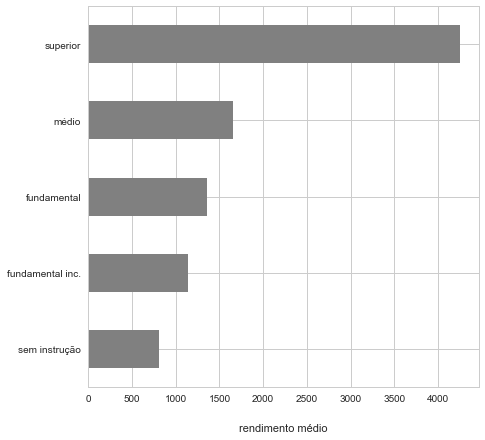

In [8]:
pnad3.groupby('nivel_instrucao').rendimento.mean().plot.barh(color='gray', figsize=(7, 7))
plt.ylabel('')
plt.xlabel('rendimento médio', labelpad = 20)
plt.savefig('figuras/rendimento.png', bbox_inches='tight');

In [14]:
pnad3.groupby('nivel_instrucao').rendimento.mean().round(0)

nivel_instrucao
sem instrução        806.0
fundamental inc.    1141.0
fundamental         1357.0
médio               1655.0
superior            4251.0
Name: rendimento, dtype: float64

### **Rendimentos de acordo com o sexo e o nível de instrução**
(maiores de 17 que não frequentam a escola e rendimentos menores do que 7 mil)

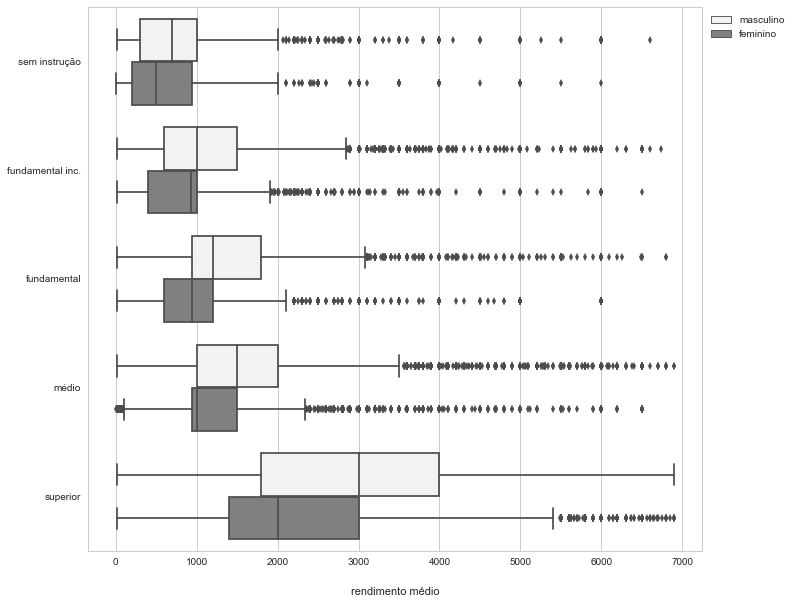

In [3]:
plt.figure(figsize=(11, 10))
sns.boxplot('rendimento', 'nivel_instrucao', hue='sexo', color = 'gray',
            data=pnad3.query('rendimento < 7000'))
plt.xlabel('rendimento médio', labelpad = 20)
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel('')
plt.savefig('figuras/sexo.png', bbox_inches='tight');

In [4]:
pnad3.query('rendimento < 7000').groupby(['nivel_instrucao', 'sexo']).rendimento.median()

nivel_instrucao   sexo     
sem instrução     masculino     700.0
                  feminino      500.0
fundamental inc.  masculino    1000.0
                  feminino      930.0
fundamental       masculino    1200.0
                  feminino      937.0
médio             masculino    1500.0
                  feminino     1000.0
superior          masculino    3000.0
                  feminino     2000.0
Name: rendimento, dtype: float64

In [10]:
# rend = pnad3.groupby('nivel_instrucao').rendimento.describe().round().drop('count', axis=1).reset_index()
# rend = rend.rename(columns={'mean': 'média', 'std':'desvio padrão', 'min':'mínimo', 'max':'máximo'})
# rend

In [75]:
book = load_workbook('artigo1.xlsx')
writer = pd.ExcelWriter('artigo1.xlsx', engine='openpyxl') 
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
nivel.to_excel(writer, 'nivel', index=False)
ocup_fund.to_excel(writer, 'ocup_fund', index=False)
ocup_med.to_excel(writer, 'ocup_med', index=False)
writer.save()